# Weather forecasting

## 1. Overview

### 1.1 Description Project
(content)


In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
#import pandas_datareader as web
import datetime as dt
from IPython.display import display
import seaborn as sns
import missingno as msno



### 1.2 Dataset overview
link: https://www.kaggle.com/datasets/vanviethieuanh/vietnam-weather-data?fbclid=IwAR0wTzEzC_QOh10_F4su1WL9ccU70RFFIFaUuJkr-p7FszG3KS3t9AhbHT4 
(content)


In [4]:
BASE_DIR = os.getcwd()
data_path = os.path.join(BASE_DIR,'data','nosing_data.csv')
df = pd.read_csv(data_path)
df.head()

Unnamed: 0  province   max  min  wind wind_d  rain  humidi  cloud   
0           0  Bac Lieu  27.0   22    17    NNE   6.9    90.0     71  \
1           1  Bac Lieu  31.0   25    20    NaN   0.0    64.0     24   
2           2  Bac Lieu  29.0   24    14      E   0.0    75.0     45   
3           3  Bac Lieu  30.0   24    30      E   0.0     NaN     52   
4           4  Bac Lieu  31.0   25    20    ENE   0.0     NaN     24   

   pressure        date  
0      1010  2009-01-01  
1      1010  2010-01-01  
2      1008  2011-01-01  
3      1012  2012-01-01  
4      1010  2013-01-01

df.info()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181960 entries, 0 to 181959
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  181960 non-null  int64  
 1   province    181960 non-null  object 
 2   max         180141 non-null  float64
 3   min         181960 non-null  int64  
 4   wind        181960 non-null  int64  
 5   wind_d      163764 non-null  object 
 6   rain        181960 non-null  float64
 7   humidi      172862 non-null  float64
 8   cloud       181960 non-null  int64  
 9   pressure    181960 non-null  int64  
 10  date        181960 non-null  object 
dtypes: float64(3), int64(5), object(3)
memory usage: 15.3+ MB


<Axes: >

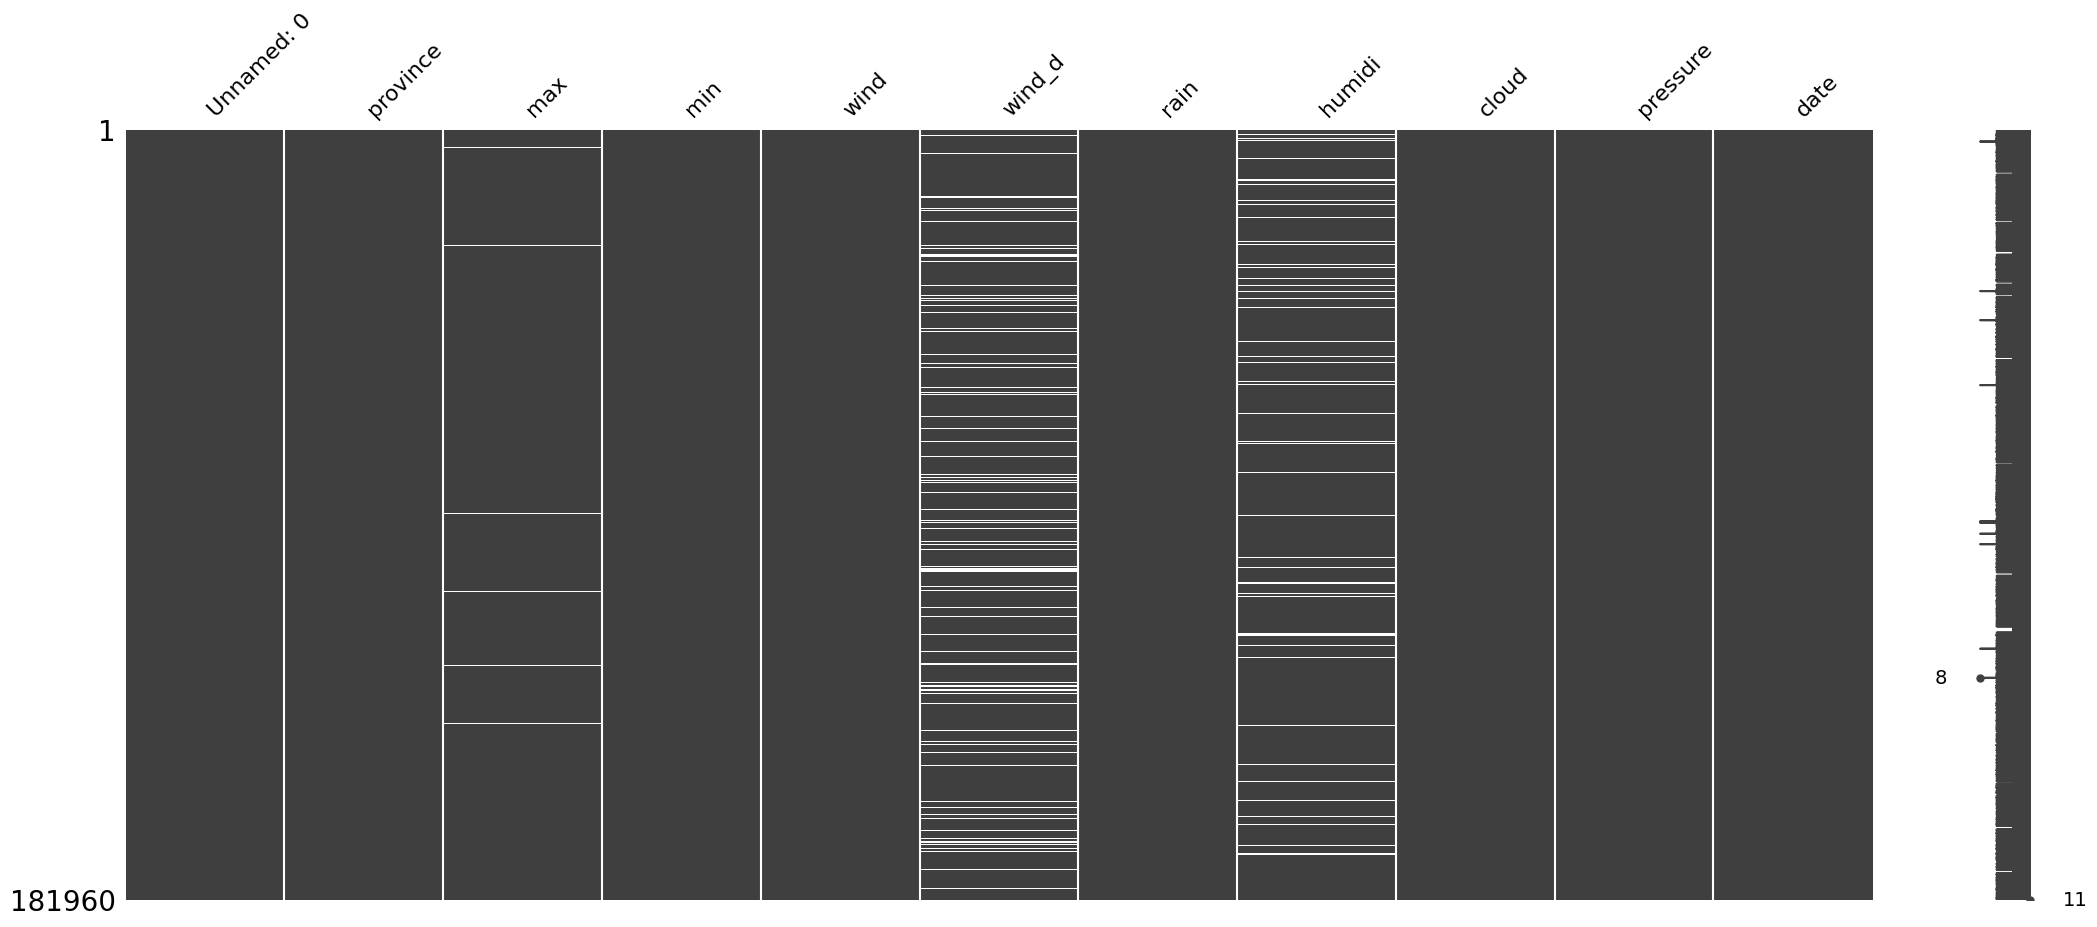

In [6]:
msno.matrix(df)

In [ ]:
# number of province and the amount of entity on each   
provinces = df["province"].value_counts()
provinces

In [5]:
#amount of province
print(len(provinces),type(provinces))

40 <class 'pandas.core.series.Series'>


In [6]:
province_list = provinces.index.tolist()

In [7]:
type(province_list)

list

## 1. Data preprocessing


### 1.1 Extract weather data by province name 

In [8]:
def extract_data_by_province(df,province_name):
    province = df.query("province == @province_name")
    province = province.drop(columns="province")
    province = province.set_index("date").sort_index()
    return province

In [9]:
data_extracted = dict()

for province in province_list:
    data_extracted[province] = extract_data_by_province(df,province)

len(data_extracted)

40

In [10]:
print(data_extracted['Bac Lieu'])

            max  min  wind wind_d  rain  humidi  cloud  pressure
date                                                            
2009-01-01   27   22    17    NNE   6.9      90     71      1010
2009-01-02   28   22    15    ENE   0.5      85     61      1010
2009-01-03   23   21     9    ESE  16.7      91     77      1011
2009-01-04   27   21     9      E   2.2      86     32      1011
2009-01-05   29   22    10     SE   0.0      81     25      1010
...         ...  ...   ...    ...   ...     ...    ...       ...
2021-06-14   33   26    11    SSW   1.5      71     48      1009
2021-06-15   31   26    12      W   1.3      75     43      1008
2021-06-16   34   26    11    WSW   3.7      74     48      1009
2021-06-17   33   27    14      W   0.5      69     45      1009
2021-06-18   32   26    11    WSW   1.0      72     52      1010

[4549 rows x 8 columns]


### 1.2 Data cleaning

In [ ]:
for province in province_list:
    montly_average = df["value"].
    data_extracted[province] 


### 1.2 Data visualizing

Data visualizing

In [ ]:
for name,data in data_extracted.items():
    display(data.describe())
    
    fig = plt.figure()
    fig,(ax1,ax2,ax3) = plt.subplots(nrows=3,figsize=(15,10))
    fig.suptitle(name)
    fig.subplots_adjust(hspace=0.5)
    data[["max","min"]].plot(ax=ax1, title = "temprature")
    data["humidi"].plot(ax=ax2, title = "humidity")
    data["pressure"].plot(ax=ax3, title = "pressure")
    plt.show()
    

 

In [ ]:
df.describe()

## Clean data

- Remove redundant columns
- Remove duplicates
- Handle missing values
- Convert data types to the correct data type

In [15]:
# Drop Unamed col
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
# Drop duplicated!
df = df.dropna(axis='columns',how='all')

In [16]:
def fill_nan_cell(df):
    for col in df.columns:
        df[col].fillna((df[col].mean()), inplace=True)
    return df

In [17]:
df = fill_nan_cell(df)

TypeError: Could not convert Bac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuBac LieuHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityHo Chi Minh CityTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyTam KyBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreBen TreHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhHoa BinhTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnTan AnBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiBien HoaHong GaiHong GaiHong GaiBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaBien HoaHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiHong GaiThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenThai NguyenBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotHueHueHueHueHueHueHueHueHueHueHueHueHueBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotBuon Me ThuotHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueHueThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaHueHueHueHueHueHueHueHueHueHueHueHueThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaHueHueHueHueHueHueHueHueHueHueHueHueThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaHueHueHueHueHueHueHueHueHueHueHueHueThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaThanh HoaCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenCa MauLong XuyenCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauCa MauLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenLong XuyenTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhTra VinhCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaCam PhaMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoMy ThoTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaTuy HoaCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhCam RanhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhNam DinhUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoUong BiCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiUong BiCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoCan ThoNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangViet TriViet TriNha TrangNha TrangNha TrangNha TrangViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangNha TrangViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriViet TriChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocChau DocPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangPhan RangVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhVinhDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietDa LatPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatDa LatPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietPhan ThietVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongVinh LongHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiHa NoiPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuPlay CuVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauVung TauHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongHai DuongQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonQui NhonYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiYen BaiHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongHai PhongRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiRach GiaHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaRach GiaHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiHanoiSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc TrangSoc Trang to numeric

In [ ]:
df.info()

## Visualization

In [ ]:
df["Temparature"].plot(figsize=(10,5), title="Temparature")


In [ ]:
df["Temparature"].plot(figsize=(10,5), title="Temparature")


## Standarlize

In [ ]:
df["Temparature_std"] =( df["Temparature"] - df['Temparature'].mean() ) / df["Temparature"].std()

In [ ]:
df["Temparature_std"].plot(figsize=(20,10))

## Wavelet Transform



<img src="illustration/The_Wavelet_Transform_for_Beginners.gif" style="width:1000px;height:700px;">

Reference:
- https://ataspinar.com/2018/12/21/a-guide-for-using-the-wavelet-transform-in-machine-learning/ 
- https://youtu.be/jnxqHcObNK4 
- https://youtu.be/eJLF9HeZA8I 

The wavelet transforms the data can be truncated and this is helpful in data reduction. If we store a small fraction of the strongest wavelet coefficients then the compressed approximation of the original data can be obtained. 

In [ ]:
import pywt
signal = df["Temparature_std"].values.squeeze()
time = df.index.to_numpy()


In [ ]:
print(signal.shape)

In [ ]:

fig, ax = plt.subplots(figsize=(6,1))
ax.set_title("Original Signal: ")
ax.plot(signal)
plt.show()
    
data = signal
waveletname = 'db5'
 
fig, axarr = plt.subplots(nrows=5, ncols=2, figsize=(6,6))
for ii in range(5):
    (data, coeff_d) = pywt.dwt(data, waveletname)
    print(data.shape,coeff_d.shape)
    axarr[ii, 0].plot(data, 'r')
    axarr[ii, 1].plot(coeff_d, 'g')
    axarr[ii, 0].set_ylabel("Level {}".format(ii + 1), fontsize=14, rotation=90)
    axarr[ii, 0].set_yticklabels([])
    if ii == 0:
        axarr[ii, 0].set_title("Approximation coefficients", fontsize=14)
        axarr[ii, 1].set_title("Detail coefficients", fontsize=14)
    axarr[ii, 1].set_yticklabels([])
plt.tight_layout()
plt.show()

- The DWT return two sets of coefficients; the approximation coefficients and detail coefficients.
- The approximation coefficients represent the output of the low pass filter (averaging filter) of the DWT.
- The detail coefficients represent the output of the high pass filter (difference filter) of the DWT.

Length of coefficients arrays depends on the selected mode. For all modes except periodization:

len(cA) == len(cD) == floor((len(data) + wavelet.dec_len - 1) / 2)

For periodization mode (“per”):

len(cA) == len(cD) == ceil(len(data) / 2)

In [ ]:
## wavelet Compression
level= 5
waveletname = "db5"

#show original
fig, ax = plt.subplots(figsize=(8,4))
ax.set_title("Original Signal: ")
ax.plot(time,signal)
plt.show()


coeffs = pywt.wavedec(signal, waveletname, level=level)
coeff_arr, coeff_slices = pywt.coeffs_to_array(coeffs)

Csort = np.sort(np.abs(coeff_arr.reshape(-1)))
print(Csort.shape)

for keep in (0.5, 0.1, 0.05, 0.001):
    #find desire threshold point 
    thresh = Csort[int(np.floor((1-keep)*len(Csort)))]
    ind = np.abs(coeff_arr) > thresh
    cfilt = coeff_arr * ind

    coeffs_filt = pywt.array_to_coeffs(cfilt,coeff_slices, output_format='wavedec')

    #plot reconstruction
    compress = pywt.waverec(coeffs_filt,wavelet=waveletname)
    plt.figure(figsize=(8,4))
    plt.plot(time,compress)
    plt.title("keep = " + str(keep))
    plt.show()

    print(len(Csort)-int(np.floor((1-keep)*len(Csort))))



In [ ]:

(cA1, cD1) = pywt.dwt(signal, 'db2')
reconstructed_signal = pywt.idwt(cA1, cD1, 'db2', 'smooth')
 
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(time,signal, label='signal')
ax.plot(time,reconstructed_signal, label='reconstructed signal', linestyle='--')
ax.legend(loc='upper left')
plt.show()